프로젝트를 잘 마무리하셨나요?

혼자 프로젝트를 수행하기 어려운 분들을 위해 이번 스텝에서는 가이드를 제공하려고 합니다. 혹시라도 프로젝트를 아직 완성하지 못한 분들은 프로젝트를 완성한 후에 가이드를 봐주세요. 😊

# **프로젝트 가이드**

**데이터 불러오기**

In [9]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import os
from os.path import join

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data_dir=('/content/drive/MyDrive/dataFLIPPED')

In [16]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
# [[YOUR CODE]]
entry_data_path = join(data_dir, 'entry_data.csv')
sales_data_path = join(data_dir, 'sales_data.csv')
item_data_path = join(data_dir, 'item_data.csv')
iten_data_path = join(data_dir, 'item_entry_data.csv')

entry = pd.read_csv(entry_data_path)
sales = pd.read_csv(sales_data_path)
item = pd.read_csv(item_data_path)
iten = pd.read_csv(iten_data_path)

In [17]:
# entry_data 데이터 정보 확인하기
# [[YOUR CODE]]
entry.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [18]:
# sales_data 데이터 정보 확인하기
# [[YOUR CODE]]
sales.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [19]:
# item_data 데이터 정보 확인하기
# [[YOUR CODE]]
item.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [20]:
# item_entry_data 데이터 정보 확인하기
# [[YOUR CODE]]
iten.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


**3-2 데이터 분석하기**

   -  필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
    월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
    힌트: groupby() 함수를 사용하세요.


In [21]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = sales

In [22]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
# [[YOUR CODE]]
temp_var['date'] = sales['결제일시'].str[:7]

salse_data의 결제금액에는 쉼표(,)가 들어있어서 현재 문자열로 인식되고 있어요. 따라서 쉼표를 지우고, 문자열을 숫자료 바꿔줘야합니다.

In [24]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
# [[YOUR CODE]]
sales['결제금액'] = sales['결제금액'].str.replace(',', '')

In [25]:
# salse_data의 결제금액을 숫자형태로 바꾸기
# [[YOUR CODE]]
temp_var['payment'] = sales['결제금액'].astype(int)

In [26]:
# temp_var의 payment열을 date 기준으로 집계하기
# [[YOUR CODE]]
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

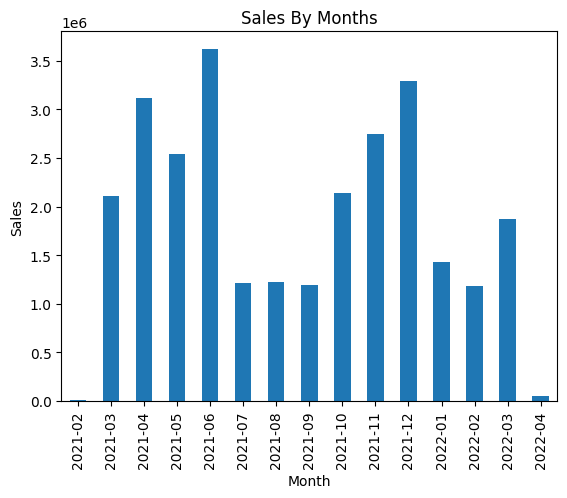

In [27]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
ax = payment_data.plot(kind='bar')

plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)

    여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

    힌트: value_counts() 함수를 사용하세요.

In [28]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# [[YOUR CODE]]
items_count = temp_var['상품명'].value_counts()
items_count

김치볶음밥           1211
라면               756
짜장라면             457
치즈불고기볶음밥         423
계란추가             315
                ... 
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
오늘은 한돈간장불고기        1
Name: 상품명, Length: 100, dtype: int64

In [29]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
# [[YOUR CODE]]
items_count = pd.DataFrame(items_count)
items_count[:10]

,상품명
김치볶음밥,1211
라면,756
짜장라면,457
치즈불고기볶음밥,423
계란추가,315
아메리카노(ICE),314
낙지볶음밥,314
새우볶음밥,311
치즈감자튀김,247
감자튀김,242


In [32]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# [[YOUR CODE]]
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/content/drive/MyDrive/dataFLIPPED/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


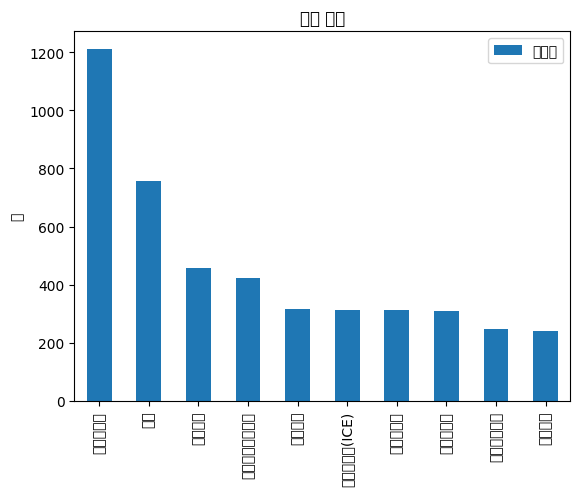

In [33]:
# 집계 결과를 시각화하기
# [[YOUR CODE]]
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

- 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

  힌트: value_counts() 함수를 사용하세요.

In [34]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# [[YOUR CODE]]
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: payment, Length: 100, dtype: int64

In [35]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
새우볶음밥         1529800
치즈감자튀김        1348700
감자튀김          1083800
아메리카노(ICE)     936100
불닭볶음면          688500
Name: payment, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45805 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_te

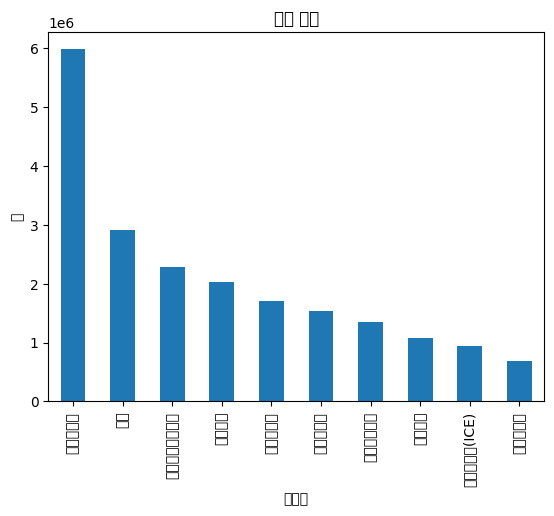

In [36]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

- 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)

    여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

  힌트: value_counts() 함수를 사용하세요.

In [37]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
# [[YOUR CODE]]
temp_var = entry
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [38]:
# temp_var의 금액을 숫자형태로 변환하기
# [[YOUR CODE]]
temp_var['금액'] = temp_var['금액'].astype(int)

In [39]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
# [[YOUR CODE]]
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [40]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
# [[YOUR CODE]]
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

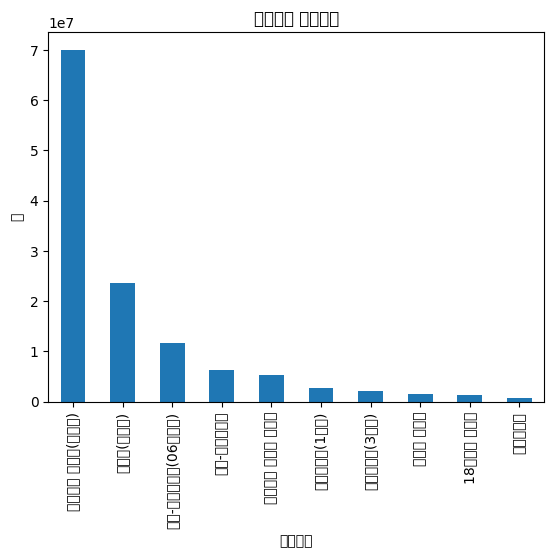

In [41]:
# 집계 결과 시각화하기
# [[YOUR CODE]]
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()

**내가 정의한 문제 해결하기**

In [ ]:
# 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

In [ ]:
# [[YOUR CODE]]

**4. 전략 수립 및 실행**

아래 질문에 답을 하며 분석을 평가하고, 앞으로의 전략을 수립해봅시다.

여러분, 처음 목표했던 분석은 달성되었나요? '모두카페'에게 어떤 전략을 제안할 수 있나요?

주어진 필수 3문제는 아래와 같이 정리할 수 있습니다.

    월별 매출액 추세: 2021년 6월이 가장 높은 매출액을, 2021년 9월이 가장 낮은 매출액을 보인다.
    가장 인기있는 음식/음료: 김치볶음밥, 그리고 라면이 가장 많이 팔렸다.
    가장 많이 팔린 입장권 종류: 한국대생(종일권)이 가장 많이 팔렸다. 두번째는 일반 입장권(종일권)이다.

아무래도 대학 앞에 있는 스터디카페다보니 매출현황이 대학 학기 패턴을 따라가고 있는 것 같습니다. 물론 COVID-19에 따른 영업제한 조치 또한 무시할 수 없어요. 앞으로 우리 모두카페는 어떻게 해야 할까요?